# I Solving the Sum of Two Digits Programming Challenge

## C++

In [2]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [1]:
!g++ APlusB.cpp -o APlusB
!./APlusB

g++: error: APlusB.cpp: No such file or directory
g++: fatal error: no input files
compilation terminated.
/bin/bash: ./APlusB: No such file or directory


### Test input output files

In [3]:
%%writefile input1.txt
4 8

Writing input1.txt


In [4]:
%%writefile output1.txt
12

Writing output1.txt


In [5]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [6]:
%%writefile output2.txt
4

Writing output2.txt


In [7]:
!./APlusB < input1.txt

/bin/bash: ./APlusB: No such file or directory


In [8]:
!./APlusB < input2.txt

/bin/bash: ./APlusB: No such file or directory


### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [9]:
!grep -xvFf output1.txt output1.txt 

In [10]:
!grep -xvFf output1.txt output2.txt 

4


In [11]:
!grep -xvFf output2.txt output1.txt 

12


In [12]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

/bin/bash: ./APlusB: No such file or directory


In [13]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

/bin/bash: ./APlusB: No such file or directory


## Python

In [14]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [18]:
!python sum.py

4 8
12


In [16]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [17]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [19]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [20]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

4 8 
^C


### Test 1: Small numbers

In [21]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [22]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [23]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [24]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [25]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [26]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [80]:
%%writefile max_pairwise_product_stressWrite.cpp

#include <cstdlib>
#include <iostream>
#include <vector>



long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            max_product = std::max(max_product,
                numbers[i] * numbers[j]);
        }
    }

    return max_product;
}

long long MaxPairwiseProduct2(const vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;

int main() {

    for (int j=0; j<20; j++) {
        int n = 2 + rand() %21;
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(1 + (rand() % (200000 - 1 + 1)));
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        cout << "\n";
        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProduct2(a);

        if (res1 != res2) {
            cout << "OK'nt: " << res1 << " " << res2 << "\n";
        } else {
            cout << "OK\n";
        }
    }
}

Overwriting max_pairwise_product_stressWrite.cpp


In [154]:
!g++ max_pairwise_product_stressWrite.cpp -o max_pairwise_product_stressWrite
!./max_pairwise_product_stressWrite

max_pairwise_product_stressWrite.cpp: In function ‘long long int MaxPairwiseProduct(const std::vector<int>&)’:
max_pairwise_product_stressWrite.cpp:15:40: error: no matching function for call to ‘max(long long int&, int)’
                 numbers[i] * numbers[j]);
                                        ^
In file included from /usr/include/c++/7/bits/char_traits.h:39:0,
                 from /usr/include/c++/7/ios:40,
                 from /usr/include/c++/7/ostream:38,
                 from /usr/include/c++/7/iostream:39,
                 from max_pairwise_product_stressWrite.cpp:3:
/usr/include/c++/7/bits/stl_algobase.h:219:5: note: candidate: template<class _Tp> constexpr const _Tp& std::max(const _Tp&, const _Tp&)
     max(const _Tp& __a, const _Tp& __b)
     ^~~
/usr/include/c++/7/bits/stl_algobase.h:219:5: note:   template argument deduction/substitution failed:
max_pairwise_product_stressWrite.cpp:15:40: note:   deduced conflicting types for parameter ‘const _Tp’ (‘long long int

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [27]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [28]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [29]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

8 10
55
^C


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [30]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [31]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [32]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [33]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [34]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
^C


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [91]:
%%writefile max_pairwise_product_efficient.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cout;
using std::cin;


long long MaxPairwiseProduct(const vector<int>& numbers) {
    int n = numbers.size();

    int maxIndex1 = -1;
    for (int i = 0; i < n; ++i)
        if ((maxIndex1 == -1) || (numbers[i] > numbers[maxIndex1]))
            maxIndex1 = i;

    int maxIndex2 = -1;
    for (int j = 0; j < n; ++j)
        if ((j != maxIndex1) && ((maxIndex2 == -1) || (numbers[j] > numbers[maxIndex2])))
            maxIndex2 = j;

    return ((long long)(numbers[maxIndex1])) * numbers[maxIndex2];
}


int main() {
    
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    long long result = MaxPairwiseProduct(numbers);
    cout << result << "\n";

    return 0;
    
}

Overwriting max_pairwise_product_efficient.cpp


In [60]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product
!./max_pairwise_product


2
8 4
32


Test with inputs 1 and 2



In [92]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input1.txt
!time ./max_pairwise_product_efficient < input2.txt

90

real	0m0.004s
user	0m0.000s
sys	0m0.004s
40000000000

real	0m0.005s
user	0m0.001s
sys	0m0.002s


Test and time it with input 3

In [42]:
!time ./max_pairwise_product_efficient < input3.txt

39999800000

real	0m0.061s
user	0m0.059s
sys	0m0.001s


20 stress tests

In [82]:
%%writefile max_pairwise_product_efficient_tests.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cout;
using std::cin;

long long MaxPairwiseProduct(const vector<int>& numbers) {
    long long result = 0;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if(((long long)numbers[i]) * numbers[j] > result){
                result= ((long long)(numbers[i])) * numbers[j];
            }
        }
    }

    return result;
}

long long MaxPairwiseProductFast(const vector<int>& numbers) {
    int n = numbers.size();

    int maxIndex1 = -1;
    for (int i = 0; i < n; ++i)
        if ((maxIndex1 == -1) || (numbers[i] > numbers[maxIndex1]))
            maxIndex1 = i;

    int maxIndex2 = -1;
    for (int j = 0; j < n; ++j)
        if ((j != maxIndex1) && ((maxIndex2 == -1) || (numbers[j] > numbers[maxIndex2])))
            maxIndex2 = j;

    cout << maxIndex1 << " " << maxIndex2 << "\n";
    return ((long long)(numbers[maxIndex1])) * numbers[maxIndex2];
}

int main() {
    
    while(true){
        int n = 2 + rand() %21;
        cout << n << "\n";
        vector<int> a;
        for (int i=0; i<n; ++i) {
            a.push_back(rand() % 10);
        }
        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }
        cout << "\n";
        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProductFast(a);
        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
            break;
        } else {
            cout << "OK\n";
        }
    }
int n;
cin >> n;
vector<int> numbers(n);
for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }
}

Overwriting max_pairwise_product_efficient_tests.cpp


In [83]:
!g++ max_pairwise_product_efficient_tests.cpp -o max_pairwise_product_efficient_tests
!./max_pairwise_product_efficient_tests

Se truncaron las últimas líneas 5000 del resultado de transmisión.
OK
5
2 7 6 7 3 
1 3
OK
17
4 1 8 0 1 6 6 5 0 3 3 7 7 6 6 5 5 
2 11
OK
15
2 0 0 9 6 9 3 0 6 9 7 1 1 3 5 
3 5
OK
18
3 6 6 1 1 9 5 4 6 4 2 4 2 9 4 4 1 5 
5 13
OK
15
7 6 8 7 5 9 4 6 2 0 1 2 3 9 1 
5 13
OK
10
0 0 2 7 8 8 1 2 0 1 
4 5
OK
2
6 2 
0 1
OK
7
3 0 0 3 9 7 4 
4 5
OK
15
3 7 6 7 9 1 6 2 8 9 2 2 6 2 1 
4 9
OK
12
6 3 0 5 0 3 0 5 5 2 9 6 
10 0
OK
13
5 2 3 2 0 2 4 2 8 6 0 7 1 
8 11
OK
21
5 3 6 5 0 9 5 7 1 0 7 7 7 0 8 4 9 3 6 4 8 
5 16
OK
5
6 2 1 7 0 
3 0
OK
17
6 1 6 2 7 2 9 7 2 4 6 5 5 3 4 4 3 
6 4
OK
16
8 5 0 7 9 8 6 8 0 7 5 0 0 3 4 7 
4 0
OK
2
1 9 
1 0
OK
20
0 3 1 6 1 8 9 5 4 5 0 3 0 0 2 1 0 8 9 0 
6 18
OK
2
6 2 
0 1
OK
19
0 8 6 7 9 6 6 9 1 9 7 2 9 7 8 3 4 0 6 
4 7
OK
14
2 8 5 2 8 7 4 5 3 8 5 5 7 1 
1 4
OK
15
8 9 1 8 1 0 7 5 9 6 5 4 0 5 1 
1 8
OK
2
7 1 
0 1
OK
19
9 2 1 3 7 4 2 2 0 1 4 7 9 3 8 9 6 0 7 
0 12
OK
6
9 3 7 3 6 5 
0 2
OK
19
2 4 0 6 4 2 7 9 1 2 3 4 4 4 0 1 6 5 1 
7 6
OK
11
4 1 2 8 0 8 7 5 4 2 4 
3 5
OK
2
7 6 
0 1

Count executed instructions in code and verify with inputs 1,2 and 3


In [134]:
%%writefile max_pairwise_product_efficient_execints.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cout;
using std::cin;

long long execints = 0LL;
long long MaxPairwiseProduct(const vector<int>& numbers) {
    long long m = 0LL;
    int n = numbers.size();
    execints++;

    int maxIndex1 = -1;
    execints++;
    for (int i = 0; i < n; ++i){
    execints+=2;
        if ((maxIndex1 == -1) || (numbers[i] > numbers[maxIndex1])){
            maxIndex1 = i;
            execints++;
            m++;
        }
    }
 
    int maxIndex2 = -1;
    execints++;
    for (int j = 0; j < n; ++j){
    execints+=2;
        if ((j != maxIndex1) && ((maxIndex2 == -1) || (numbers[j] > numbers[maxIndex2]))){
            maxIndex2 = j;
            execints++;
            m++;
        }
    }
    cout << m << "\n";
    return ((long long)(numbers[maxIndex1])) * numbers[maxIndex2];
    
}


int main() {
    
    long long execints = 0LL;
    int n;
    execints++;
    cin >> n;
    execints++;
    vector<int> numbers(n);
    execints+=n;
    for (int i = 0; i < n; ++i) {
        execints+=2;
        cin >> numbers[i];
        execints++;
    }

execints++;
    long long result = MaxPairwiseProduct(numbers);

    cout << result << "\n";
    cout << execints << "\n";

    return 0;
    
}

Overwriting max_pairwise_product_efficient_execints.cpp


In [136]:
!g++ max_pairwise_product_efficient_execints.cpp -o max_pairwise_product_efficient_execints
!./max_pairwise_product_efficient_execints < input1.txt
!./max_pairwise_product_efficient_execints < input2.txt
!./max_pairwise_product_efficient_execints < input3.txt

19
90
43
7
40000000000
27
399999
39999800000
800003


Calculate estimated time by instruction and number of instructions by second

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [150]:
%%writefile max_pairwise_product_super_efficient.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

int main() {
    
    int n, a, aux;
    int maxIndex1 = 0;
    int maxIndex2 = 0;
    cin >> n;

    for (int i = 0; i < n; ++i) {
        cin >> a;
        if (maxIndex1 == 0) {
            maxIndex1 = a;
        } else if (a > maxIndex1) {
            aux = maxIndex1;
            maxIndex1 = a;
            maxIndex2 = aux;
        } else if ((maxIndex2 == 0) || (a > maxIndex2)) {
            maxIndex2 = a;
        }
    }
    cout << (long long) maxIndex1*maxIndex2 << "\n";
    return 0;
}

Overwriting max_pairwise_product_super_efficient.cpp


Test with inputs 1 and 2


 

In [151]:
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input1.txt
!time ./max_pairwise_product_super_efficient < input2.txt

90

real	0m0.006s
user	0m0.003s
sys	0m0.001s
40000000000

real	0m0.003s
user	0m0.001s
sys	0m0.002s


Test and time it with input 3

In [147]:
!./max_pairwise_product_super_efficient < input3.txt

39999800000


20 stress tests 

Count executed instructions in code and verify with inputs 1,2 and 3

Calculate estimated time by instruction and number of instructions by second

## Python

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



In [152]:
%load_ext cython

In [153]:
%%cython -f
# distutils: extra_compile_args = -fopenmp
# distutils: extra_link_args = -fopenmp
# cython: language_level=3
# cython: embedsignature=True
# cython: profile=True
# cython: boundscheck=False
# coding: utf8

from libc.stdlib cimport malloc, realloc, free
from libc.stdio cimport fopen, fclose, FILE, EOF, fseek, SEEK_END, SEEK_SET
from libc.stdio cimport ftell, fgetc, fgets, getc, gets, feof, fread, getline
from libc.string cimport strlen, memcpy, strcpy, strtok, strchr, strncpy
from cython.parallel import prange, parallel, threadid

# - C structure that is set to readonly
cdef readonly struct FileContents:
    char *contents
    
cdef class CyReadFile:
    """Read in the contents of a file."""
    cdef:
        FileContents *File
        FILE *fp
        char *filename
        char *delimiter
        long file_size
        bint is_open
        bint EO_STR
    
    def __init__(self, char *delimiter, char *filename):
        self.File = <FileContents*>malloc(sizeof(CyReadFile))
        self.delimiter = delimiter
        self.filename = filename
        self.File.contents = NULL
        self.is_open = 0
        self.EO_STR = 0
        self.file_size = 0
        self.fp = NULL
        
    def open_file(self):
        """Open the file for reading."""
        self.fp = fopen(self.filename, "r")
        if self.fp == NULL:
            raise FileNotFoundError(2, "No such file or directory: '%s'" % self.filename)
        else:
            # file is now open
            self.is_open = 1
    
    def read_in_file(self):
        """Read in the entire file."""
        if self.is_open == 1:
            # get the length of the file
            fseek(self.fp, 0, SEEK_END)
            self.file_size = ftell(self.fp)
            fseek(self.fp, 0, SEEK_SET)
            # allocate memory for reading in the file
            self.File.contents = <char*>malloc(self.file_size*sizeof(char))
            # read entire file into the struct
            fread(self.File.contents, 1, self.file_size, self.fp)
            # close the file once it's read into the char array
            fclose(self.fp)
            # set is_open to 0
            self.is_open = 0
              
    def read_file_in_parallel(self):
        """Bypass the gil and read in the file."""
        if self.is_open == 1:
            with nogil:
                # get the length of the file
                fseek(self.fp, 0, SEEK_END)
                self.file_size = ftell(self.fp)
                fseek(self.fp, 0, SEEK_SET)
                # allocate memory for reading in the file
                self.File.contents = <char*>malloc(self.file_size*sizeof(char))
                # read entire file into the struct
                fread(self.File.contents, 1, self.file_size, self.fp)
                # close the file once it's read into the char array
                fclose(self.fp)
                # set is_open to 0
                self.is_open = 0
    
    def __dealloc__(self):
        """Deallocate memory"""
        free(self.File.contents)
        free(self.File)
        free(self.fp)
        free(self.filename)
        free(self.delimiter)
        
            
# - To use the cython class, we must create a python subclass that inherits from it.
# - I will set the cython variables concretely in the Python subclass

# test data
emlFile = b"Y:\\Shared\\USD\\Business Data and Analytics\\Claims_Pipeline_Files\\Mapping_Files\\EmlMappingFile.csv"

class PyReadFile(CyReadFile):
    """A python wrapper around a cython class."""
    def __init__(self):
        super().__init__(b',', emlFile)
    
        
def py_read_file(filename):
    with open(filename, "r") as f:
        return f.read()

# Screenhsoots of the Coursera Submissions in C++ and Python

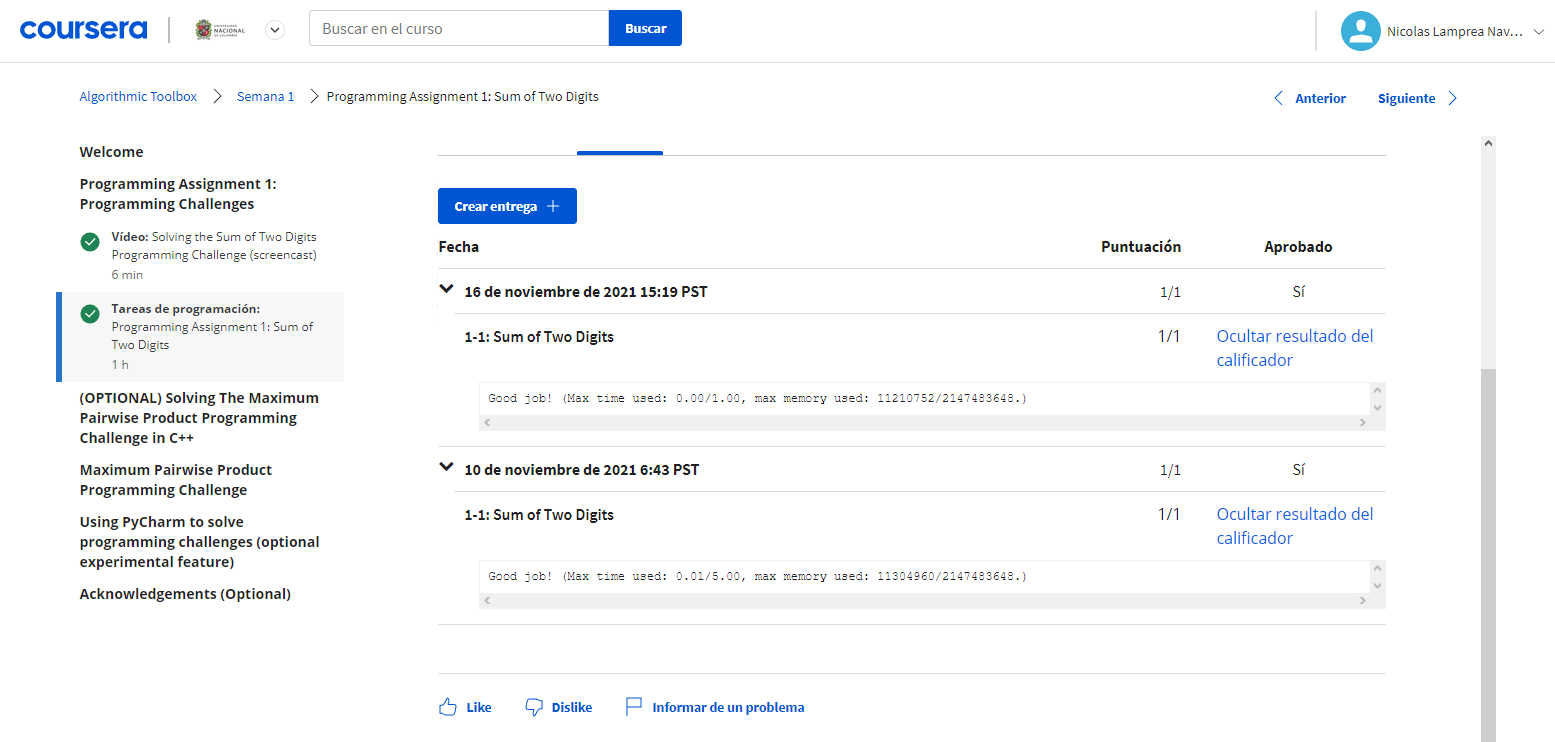

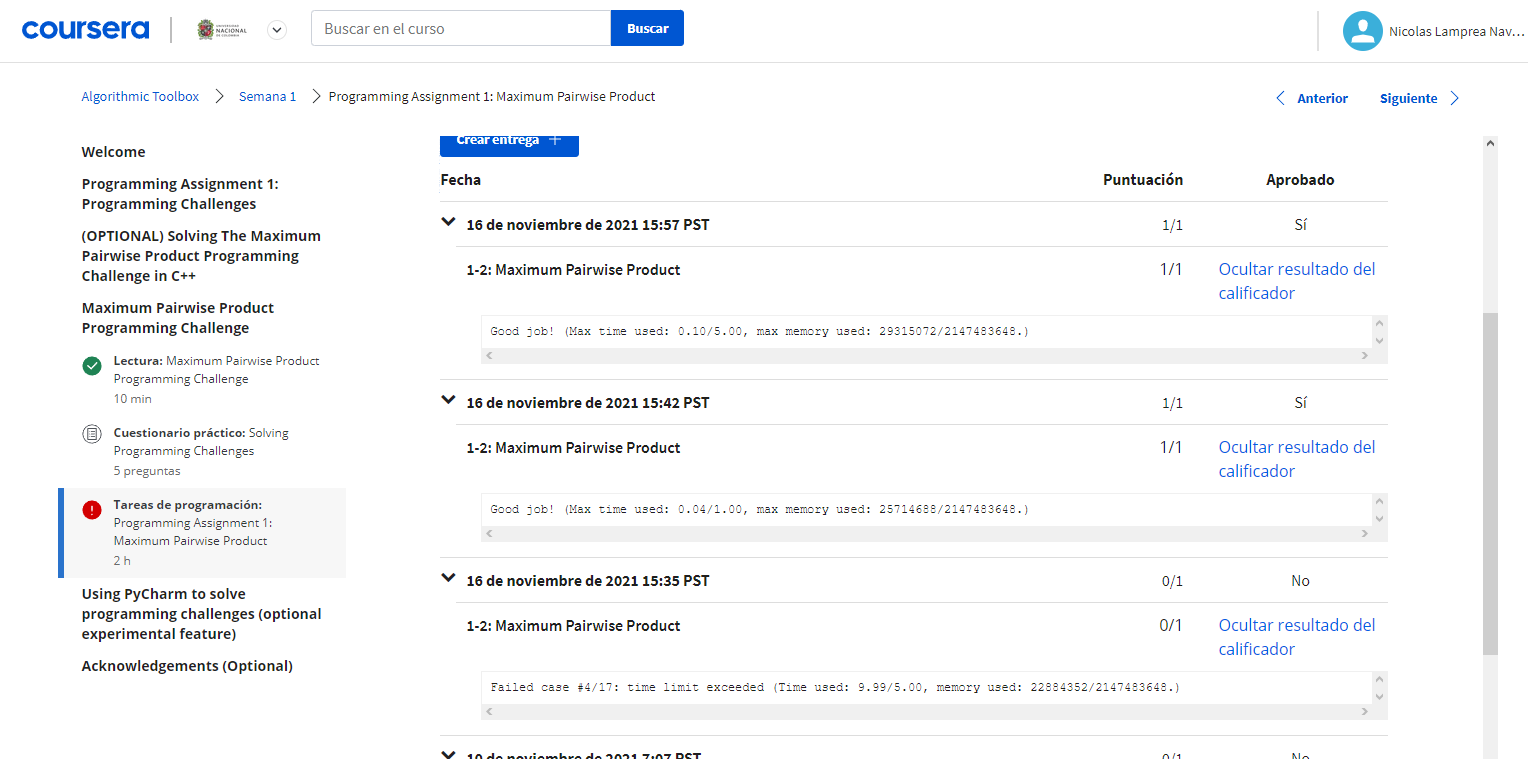